In [1]:
#name: Housing Prices (end-to-end project)
#type: classification
#aim: to predict the price of a houses on the basis of their given features and characteristics
#data: Ames Housing data set

## Feature Description

In [2]:
with open('Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [6]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# DATA CLEANING

### Removing Outliers

In [7]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

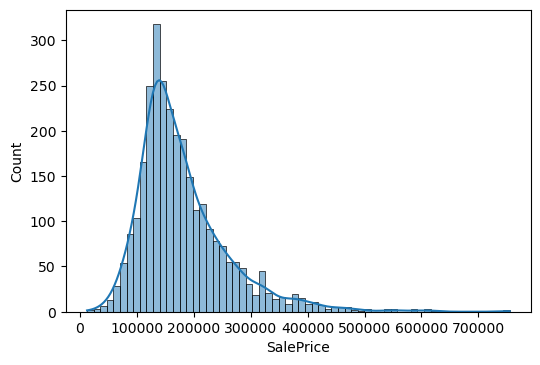

In [8]:
plt.figure(dpi=100)
sns.histplot(df["SalePrice"], kde=True);

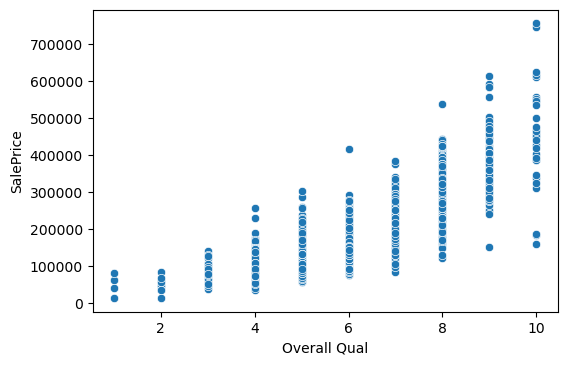

In [9]:
plt.figure(dpi=100)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

In [10]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


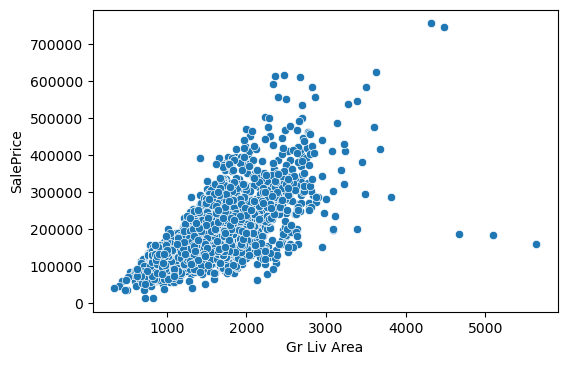

In [11]:
plt.figure(dpi=100)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

In [12]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [14]:
ind_drop = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)].index

In [15]:
#dropping outliers

df = df.drop(ind_drop,axis=0)

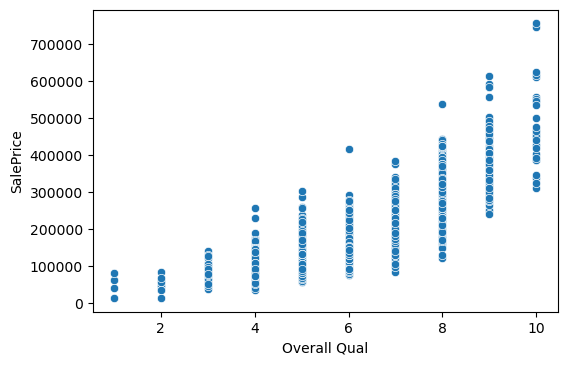

In [16]:
plt.figure(dpi=100)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);

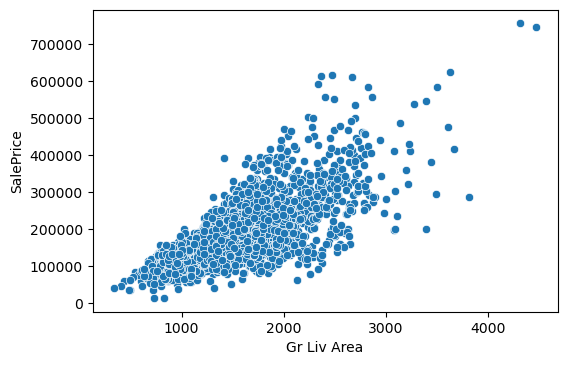

In [17]:
plt.figure(dpi=100)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

In [18]:
df.to_csv("Ames_Housing_Data_Outliers_Removed.csv",index=False)

### Dealing with missing data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2926 non-null   int64  
 1   MS SubClass      2926 non-null   int64  
 2   MS Zoning        2926 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2926 non-null   int64  
 5   Street           2926 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2926 non-null   object 
 8   Land Contour     2926 non-null   object 
 9   Utilities        2926 non-null   object 
 10  Lot Config       2926 non-null   object 
 11  Land Slope       2926 non-null   object 
 12  Neighborhood     2926 non-null   object 
 13  Condition 1      2926 non-null   object 
 14  Condition 2      2926 non-null   object 
 15  Bldg Type        2926 non-null   object 
 16  House Style      2926 non-null   object 
 17  Overall Qual  

In [20]:
df=df.drop('PID', axis=1)

In [21]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      489
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [22]:
100* df.isnull().sum() / len(df)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.712235
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [23]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [24]:
percent_nan = percent_missing(df)

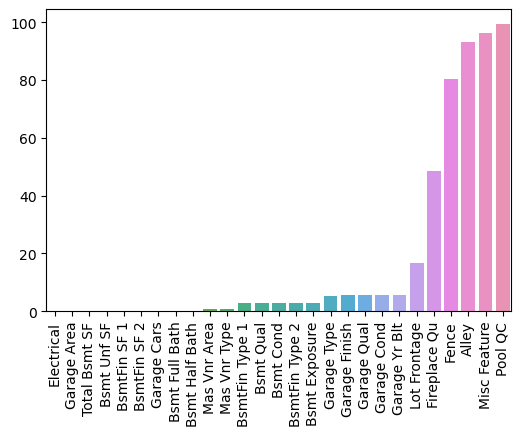

In [25]:
plt.figure(dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan);
plt.xticks(rotation=90);

(0.0, 1.0)

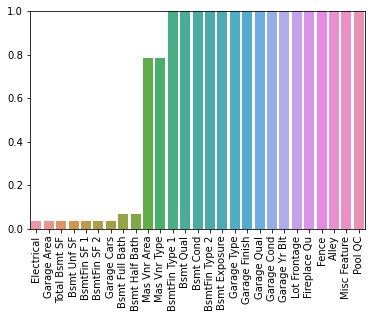

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# 1% Threshold
plt.ylim(0,1)

In [27]:
percent_nan[percent_nan < 1]

Electrical        0.034176
Garage Area       0.034176
Total Bsmt SF     0.034176
Bsmt Unf SF       0.034176
BsmtFin SF 1      0.034176
BsmtFin SF 2      0.034176
Garage Cars       0.034176
Bsmt Full Bath    0.068353
Bsmt Half Bath    0.068353
Mas Vnr Area      0.786056
Mas Vnr Type      0.786056
dtype: float64

In [28]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [29]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [30]:
#filling in missing values

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [31]:
#filling in missing values

bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [32]:
percent_nan = percent_missing(df)

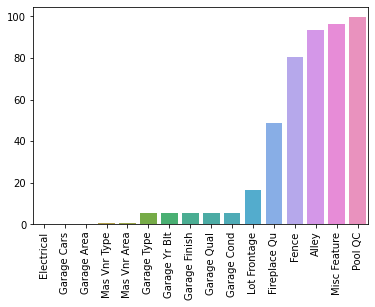

In [33]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [34]:
#dropping rows with missing 'Electrical','Garage Cars' values

df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [35]:
percent_nan = percent_missing(df)

(0.0, 1.0)

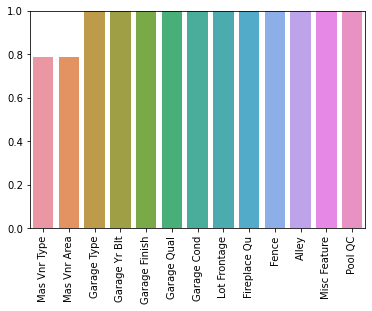

In [36]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [37]:
#filling in missing values

df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [38]:
percent_nan = percent_missing(df)

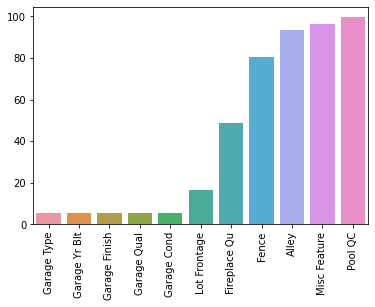

In [39]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [40]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [41]:
#filling in missing values

gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [42]:
#filling in missing values

df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [43]:
percent_nan = percent_missing(df)

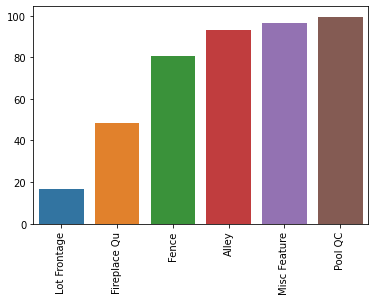

In [44]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [45]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [46]:
#dropping feature columns 'Pool QC','Misc Feature','Alley','Fence'

df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [47]:
percent_nan = percent_missing(df)

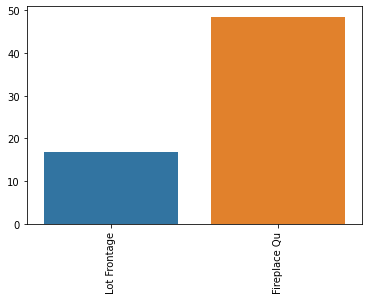

In [48]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [49]:
#filling in missing values

df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [50]:
percent_nan = percent_missing(df)

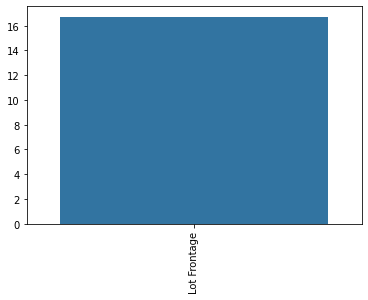

In [51]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### Imputing Lot Frontage column using Neighborhood column

In [52]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

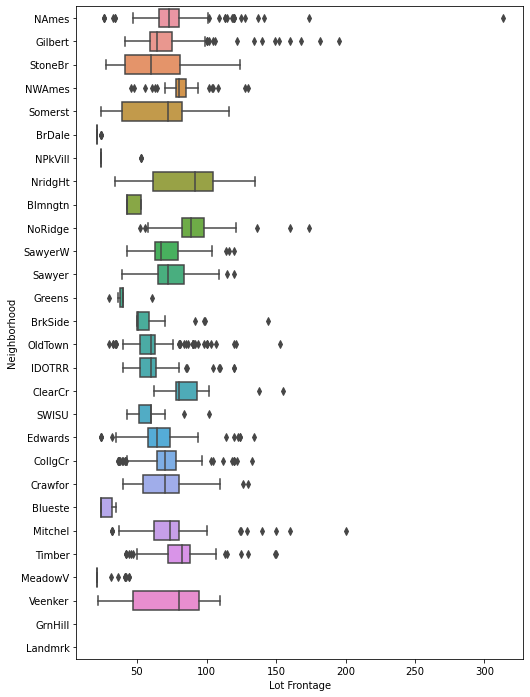

In [53]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h');

In [54]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [55]:
#imputing 'Lot Frontage' using 'Neighborhood'

df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [56]:
percent_nan = percent_missing(df)

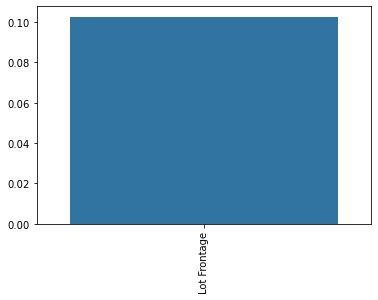

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [58]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [59]:
percent_nan = percent_missing(df)

In [60]:
percent_nan

Series([], dtype: float64)

In [61]:
# Saving the data set with no missing values

df.to_csv("Ames_Housing_Data_Cleaned.csv",index=False)

# EDA and Visualization

In [62]:
df=pd.read_csv("Ames_Housing_Data_Cleaned.csv")

In [63]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2924 non-null   int64  
 1   MS Zoning        2924 non-null   object 
 2   Lot Frontage     2924 non-null   float64
 3   Lot Area         2924 non-null   int64  
 4   Street           2924 non-null   object 
 5   Lot Shape        2924 non-null   object 
 6   Land Contour     2924 non-null   object 
 7   Utilities        2924 non-null   object 
 8   Lot Config       2924 non-null   object 
 9   Land Slope       2924 non-null   object 
 10  Neighborhood     2924 non-null   object 
 11  Condition 1      2924 non-null   object 
 12  Condition 2      2924 non-null   object 
 13  Bldg Type        2924 non-null   object 
 14  House Style      2924 non-null   object 
 15  Overall Qual     2924 non-null   int64  
 16  Overall Cond     2924 non-null   int64  
 17  Year Built    

In [65]:
corr_df=df.corr()['SalePrice'].sort_values()

In [66]:
corr_df

Enclosed Porch    -0.128678
Kitchen AbvGr     -0.119905
Overall Cond      -0.102130
MS SubClass       -0.085022
Low Qual Fin SF   -0.037701
Bsmt Half Bath    -0.036058
Yr Sold           -0.030592
Misc Val          -0.019342
BsmtFin SF 2       0.005908
3Ssn Porch         0.032188
Mo Sold            0.034916
Pool Area          0.071829
Screen Porch       0.112061
Bedroom AbvGr      0.144035
Bsmt Unf SF        0.183264
Garage Yr Blt      0.253782
2nd Flr SF         0.270844
Lot Area           0.270919
Bsmt Full Bath     0.276444
Half Bath          0.286383
Open Porch SF      0.317642
Wood Deck SF       0.328167
Lot Frontage       0.358241
BsmtFin SF 1       0.450334
Fireplaces         0.476494
TotRms AbvGrd      0.500483
Mas Vnr Area       0.511597
Year Remod/Add     0.533712
Full Bath          0.546821
Year Built         0.559207
Garage Area        0.644996
1st Flr SF         0.645957
Garage Cars        0.649011
Total Bsmt SF      0.660985
Gr Liv Area        0.728766
Overall Qual       0

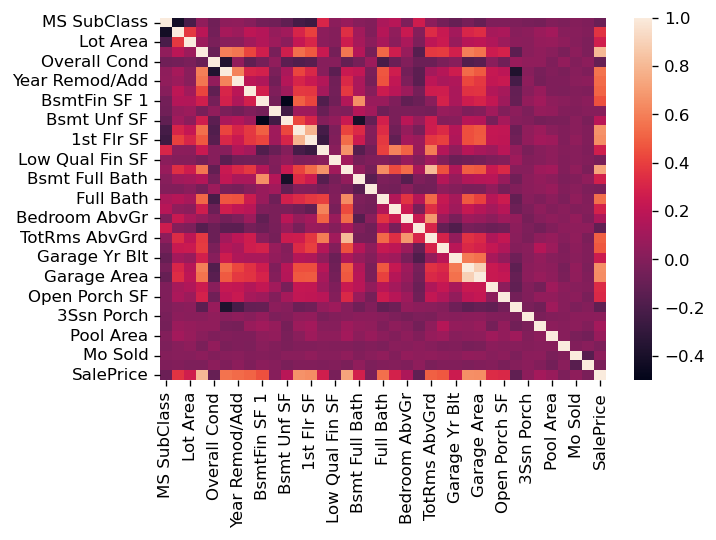

In [67]:
plt.figure(dpi=120)
sns.heatmap(df.corr());

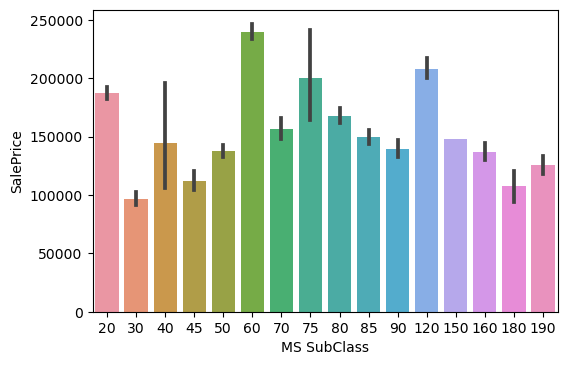

In [68]:
plt.figure(dpi=100)
sns.barplot(data=df,x='MS SubClass',y='SalePrice');

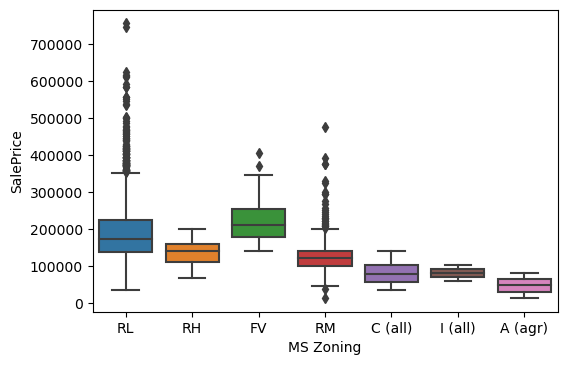

In [69]:
plt.figure(dpi=100)
sns.boxplot(data=df,x='MS Zoning',y='SalePrice');

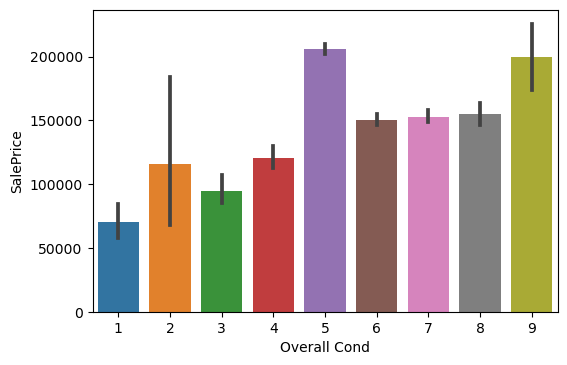

In [70]:
plt.figure(dpi=100)
sns.barplot(data=df,x='Overall Cond',y='SalePrice');

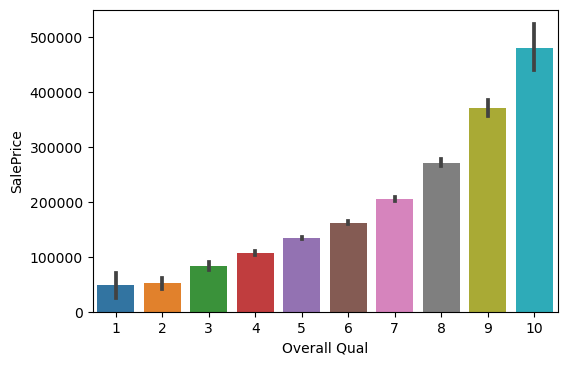

In [71]:
plt.figure(dpi=100)
sns.barplot(data=df,x='Overall Qual',y='SalePrice');

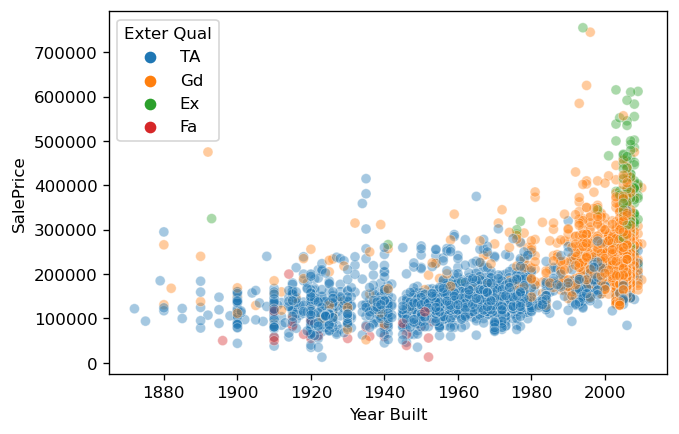

In [72]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x='Year Built',y='SalePrice',hue='Exter Qual',alpha=0.4);

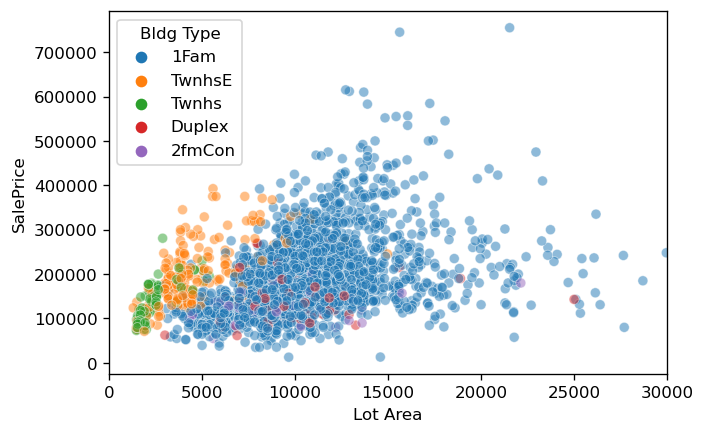

In [73]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x='Lot Area',y='SalePrice',hue='Bldg Type',alpha=0.5);
plt.xlim(0,30000);

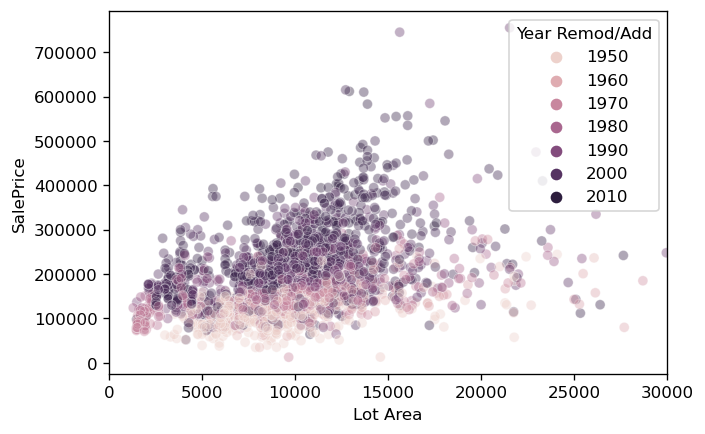

In [74]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x='Lot Area',y='SalePrice',hue='Year Remod/Add',alpha=0.4);
plt.xlim(0,30000);

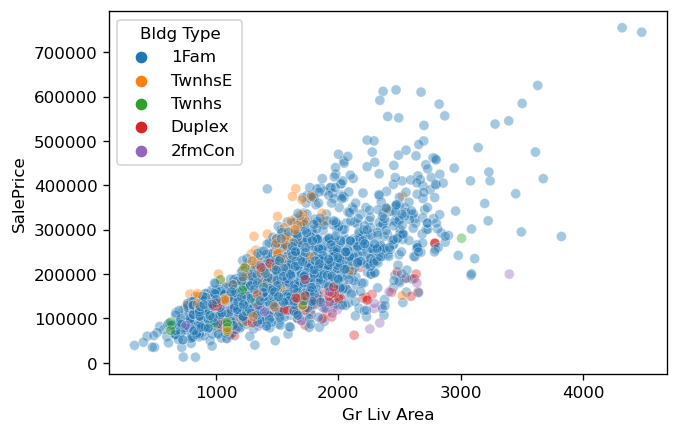

In [75]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice', hue='Bldg Type',alpha=0.4);

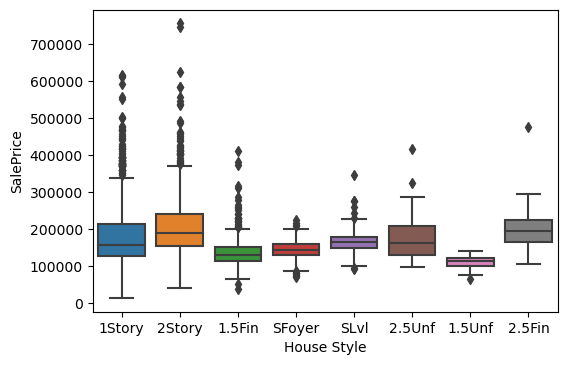

In [76]:
plt.figure(dpi=100)
sns.boxplot(data=df,x='House Style',y='SalePrice');

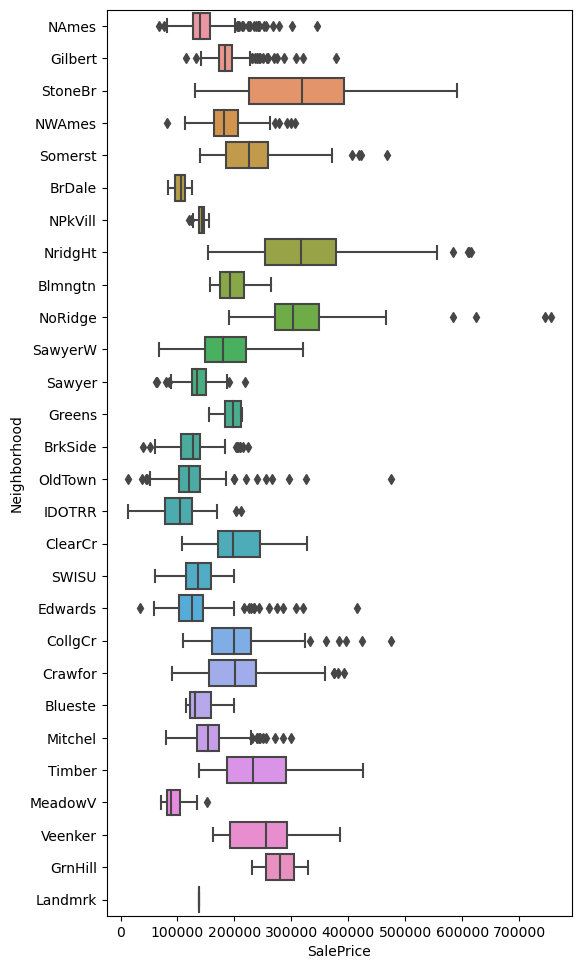

In [77]:
plt.figure(dpi=100, figsize=(6,12))
sns.boxplot(data=df,y='Neighborhood',x='SalePrice');

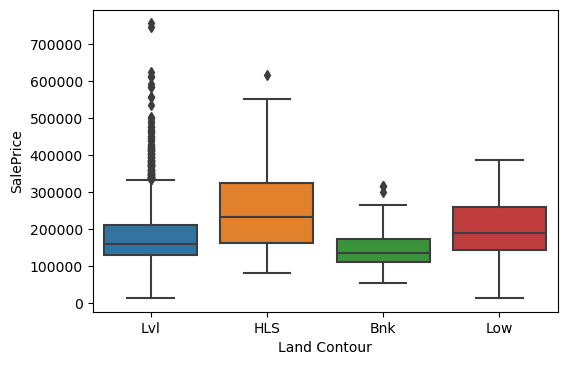

In [78]:
plt.figure(dpi=100)
sns.boxplot(data=df,x='Land Contour',y='SalePrice');

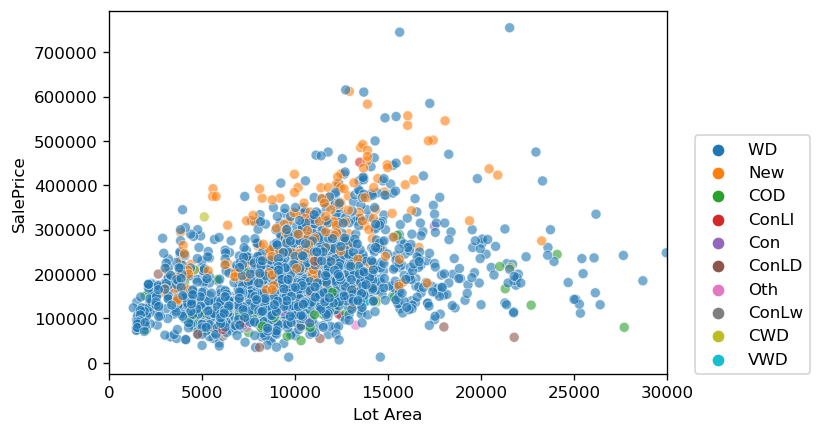

In [79]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x='Lot Area',y='SalePrice',hue='Sale Type',alpha=0.6);
plt.xlim(0,30000);
plt.legend(loc=(1.05,0));

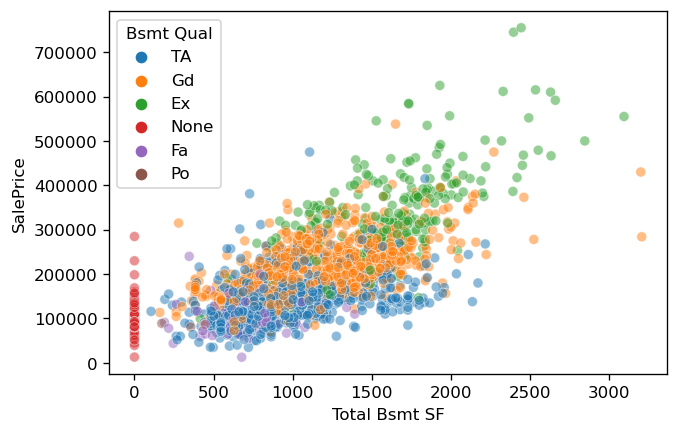

In [80]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x='Total Bsmt SF',y='SalePrice',hue='Bsmt Qual',alpha=0.5);

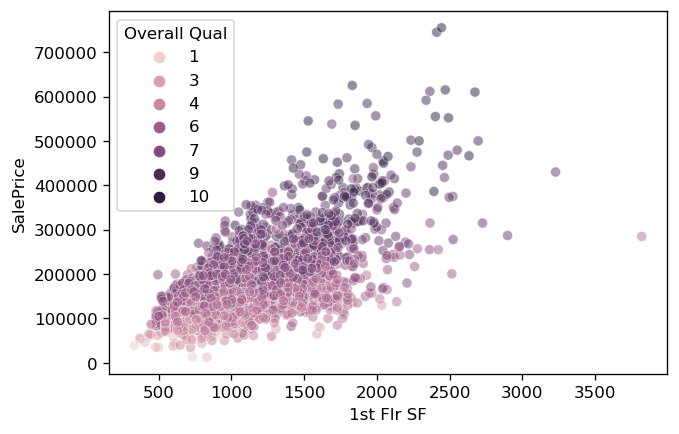

In [81]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x='1st Flr SF',y='SalePrice',hue='Overall Qual',alpha=0.5);

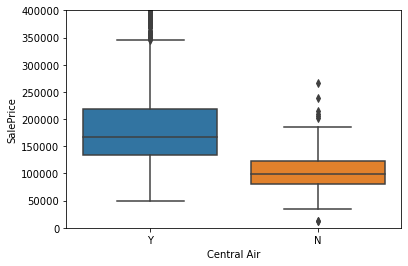

In [82]:
sns.boxplot(data=df,y='SalePrice',x='Central Air');
plt.ylim(0,400000);

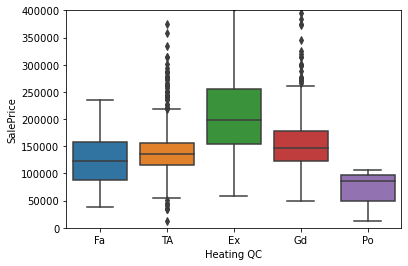

In [83]:
sns.boxplot(data=df,y='SalePrice',x='Heating QC');
plt.ylim(0,400000);

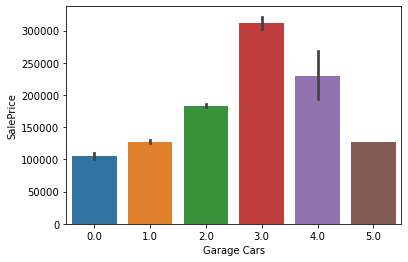

In [84]:
sns.barplot(data=df,x='Garage Cars',y='SalePrice');

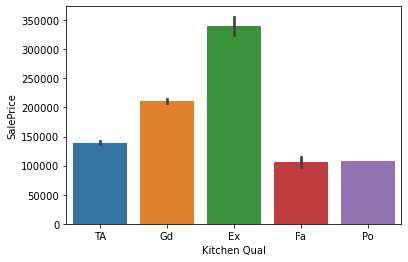

In [85]:
sns.barplot(data=df,x='Kitchen Qual',y='SalePrice');

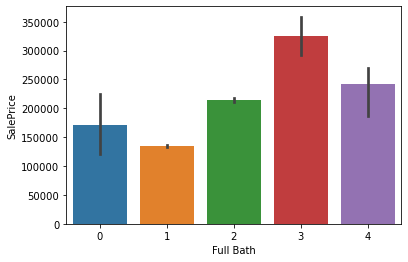

In [86]:
sns.barplot(data=df,x='Full Bath',y='SalePrice');

### Creating Dummy Variables

In [87]:
df = pd.read_csv("Ames_Housing_Data_Cleaned.csv")

In [88]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [89]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [90]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [91]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [92]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [93]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2920,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2921,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2922,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [94]:
#saving final df

final_df.to_csv('Ames_Housing_Data_Final.csv', index=False)

# train-test split and scaling

In [95]:
df=pd.read_csv("Ames_Housing_Data_Final.csv")

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X=df.drop('SalePrice',axis=1)

In [98]:
y=df['SalePrice']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler=StandardScaler()

In [102]:
X_train= scaler.fit_transform(X_train)

In [103]:
X_test= scaler.transform(X_test)

# Testing Various regression Models through Cross-Validation

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [105]:
def eval_model(model, X_=X_train, y_=y_train):
    scores=cross_val_score(estimator=model,X=X_,y=y_,cv=10,scoring='neg_root_mean_squared_error')
    avg_rms=-scores.mean()
    print('Average Root Mean Squarred Error: {}'.format(avg_rms))

### Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
lin_regr=LinearRegression()

In [107]:
eval_model(lin_regr)

Average Root Mean Squarred Error: 1652236619482177.0


### Polynomial Regression

In [108]:
from sklearn.preprocessing import PolynomialFeatures
converter=PolynomialFeatures(degree=2, include_bias=False)

In [109]:
poly_X=converter.fit_transform(X_train)

In [110]:
eval_model(lin_regr,poly_X)

Average Root Mean Squarred Error: 13264929225685.604


### L1 Regularization

In [111]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [112]:
eval_model(lasso,poly_X)

Average Root Mean Squarred Error: 42213.980894769236


### L2  Regularization

In [113]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [114]:
eval_model(ridge,poly_X)

Average Root Mean Squarred Error: 37659.646039283645


### Elastic-net Regularization

In [115]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

In [116]:
eval_model(elastic,poly_X)

Average Root Mean Squarred Error: 29356.087169927156


### Support Vector Machines

In [117]:
from sklearn.svm import SVR
svr=SVR()

In [118]:
eval_model(svr)

Average Root Mean Squarred Error: 82261.40284823495


### KNN

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [120]:
eval_model(knn)

Average Root Mean Squarred Error: 36913.35719344646


### Decision Tree

In [121]:
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor()

In [122]:
eval_model(dec_tree)

Average Root Mean Squarred Error: 33333.89085159728


### Random Forests

In [123]:
from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()

In [124]:
eval_model(rand_forest)

Average Root Mean Squarred Error: 23439.36416687506


### AdaBoost

In [125]:
from sklearn.ensemble import AdaBoostRegressor
adaboost=AdaBoostRegressor()

In [126]:
eval_model(adaboost)

Average Root Mean Squarred Error: 30303.232059729442


### Gradient Boost

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost=GradientBoostingRegressor()

In [128]:
eval_model(gradboost)

Average Root Mean Squarred Error: 21424.91283283968


# Hyperparamter tuning for Gradient Boosting using GridSearchCV

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid={'learning_rate':[0.07,0.1,0.2], 'n_estimators':[100,200,500], 'max_depth':[3,5,10]}

In [131]:
grad_boost_grid_model=GridSearchCV(estimator=gradboost, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error',verbose=False)

In [132]:
grad_boost_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.07, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error', verbose=False)

In [133]:
grad_boost_grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

### Feature Importances

In [134]:
feat_imp=pd.DataFrame(grad_boost_grid_model.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])

In [135]:
feature_importances=feat_imp[feat_imp['Importance']>0.01].sort_values(by='Importance',ascending=True)

In [136]:
feature_importances

,Importance
2nd Flr SF,0.011828
Year Remod/Add,0.014075
Full Bath,0.014425
Lot Area,0.017716
Year Built,0.025523
1st Flr SF,0.028910
BsmtFin SF 1,0.031123
Garage Cars,0.044573
Total Bsmt SF,0.052439
Gr Liv Area,0.126866


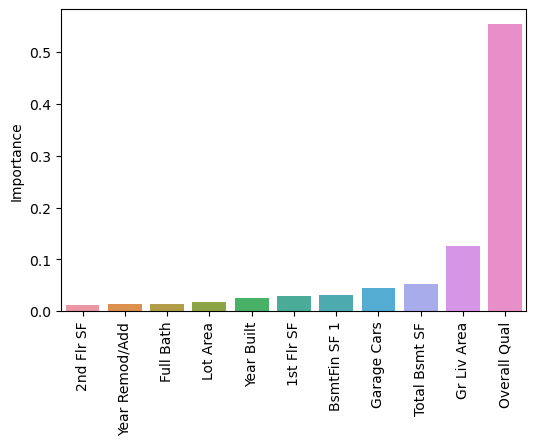

In [137]:
plt.figure(dpi=100)
sns.barplot(data=feature_importances,x=feature_importances.index,y='Importance');
plt.xticks(rotation=90);

## Final Performance Evaluation

In [138]:
y_pred=grad_boost_grid_model.predict(X_test)

In [139]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [140]:
print('Root Mean Squarred Error: ${}'.format(RMSE))

Root Mean Squarred Error: $19761.433327681505


In [141]:
MAE=mean_absolute_error(y_test,y_pred)

In [142]:
print('Mean Absolute Error: ${}'.format(MAE))

Mean Absolute Error: $12650.057610109303


# Final Model and Pipeline Setup

In [143]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [144]:
final_model=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=500)

In [145]:
df = pd.read_csv("Ames_Housing_Data_Cleaned.csv")

In [146]:
df_cols=pd.read_csv("Ames_Housing_Data_Outliers_Removed.csv")

In [147]:
df_cols=df_cols.drop('SalePrice',axis=1)

In [148]:
columns=df_cols.columns

In [149]:
y=df['SalePrice']

In [150]:
df=df.drop('SalePrice',axis=1)

In [151]:
numeric_preprocessing=Pipeline([('imputer', SimpleImputer(strategy="median")),
                               ('scaler', StandardScaler())])

In [152]:
categorical_preprocessing=Pipeline([('imputer', SimpleImputer(strategy="most_frequent")),
                                   ('OneHotEncoder', OneHotEncoder(sparse=False,drop='first'))])

In [153]:
num_attr=list(df.select_dtypes(exclude='object').columns)
cat_attr=list(df.select_dtypes(include='object').columns)
num_attr.remove('MS SubClass')
cat_attr.insert(0,'MS SubClass')

In [154]:
column_transformer= ColumnTransformer([('numerical', numeric_preprocessing, num_attr),
                                ('categorical', categorical_preprocessing, cat_attr)])

In [162]:
def clean_df(data):
    
    data['MS SubClass']=data['MS SubClass'].apply(str)
    data= data.drop(['PID','Pool QC','Misc Feature','Alley','Fence'],axis=1)
    bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
    data[bsmt_num_cols] = data[bsmt_num_cols].fillna(0)
    bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
    data[bsmt_str_cols] = data[bsmt_str_cols].fillna('None')
    data["Mas Vnr Type"] = data["Mas Vnr Type"].fillna("None")
    data["Mas Vnr Area"] = data["Mas Vnr Area"].fillna(0)
    gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
    data[gar_str_cols] = data[gar_str_cols].fillna('None')
    data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(0)
    data['Fireplace Qu'] = data['Fireplace Qu'].fillna("None")
    data['Lot Frontage'] = data['Lot Frontage'].fillna(0) 
    
    return data

In [163]:
preprocessor=Pipeline([('to_object',FunctionTransformer(clean_df, validate=False)),
                      ('column_transformer', column_transformer)])

In [160]:
X=preprocessor.fit_transform(df)

In [161]:
final_model.fit(X,y)

GradientBoostingRegressor(n_estimators=500)

In [164]:
pipe_model=Pipeline([('preprocessor',preprocessor),('model',final_model)])

## Saving Model

In [165]:
import joblib

In [166]:
joblib.dump(pipe_model, "Housing Prices Model.pkl")

['Housing Prices Model.pkl']

In [167]:
joblib.dump(list(columns), "Housing Prices Columns.pkl")

['Housing Prices Columns.pkl']